In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def kernel_rbf(a, b, L): 
    output = -1 * np.ones((a.shape[0], b.shape[0])) 
    for i in range(a.shape[0]):
        for j in range(b.shape[0]):
            output[i, j] = np.power(np.linalg.norm(a[i, :] - b[j, :], 2), 2)
    return np.exp(- L * output)

In [29]:
class GaussianProcessRegressor: 

    def __init__(self, kernel_L, sigma_sq_process, input_dim):
        self.kernel_L = kernel_L
        self.sigma_sq_process = sigma_sq_process  
        self.input_dim = input_dim

    def load_data(self, x, y):
        n = x.shape[0]
        self.x_vect = np.array([x]).reshape(n, self.input_dim)
        self.y_vect = np.array([y]).reshape(n, 1)
        print(kernel_rbf(self.x_vect, self.x_vect, self.kernel_L) + self.sigma_sq_process * np.eye(n))
        self.K_matrix_inv = np.linalg.inv(kernel_rbf(self.x_vect, self.x_vect, self.kernel_L) + self.sigma_sq_process * np.eye(n))
        print(self.K_matrix_inv)
    
    def compute(self, x):
        assert x.ndim == 2 and x.shape[1] == self.input_dim, "compute() function: Error in input dimension"
        n = x.shape[0]
        mu = np.zeros(n)
        sigma = np.zeros(n)
        for i in range(n):
            K_star = kernel_rbf(self.x_vect, x[i, :].reshape(1, self.input_dim), self.kernel_L)
            mu[i] = K_star.T @ self.K_matrix_inv @ self.y_vect
            sigma[i] = kernel_rbf(x[i, :].reshape(1, self.input_dim), x[i, :].reshape(1, self.input_dim), self.kernel_L) - K_star.T @ self.K_matrix_inv @ K_star
        return mu, sigma

In [30]:
class HeteroskedasticGaussianProcessRegressor: 

    def __init__(self, kernel_L, input_dim):
        self.kernel_L = kernel_L 
        self.input_dim = input_dim

    def load_data(self, x, y, sigma_sq):
        n = x.shape[0]
        self.x_vect = np.array([x]).reshape(n, self.input_dim)
        self.y_vect = np.array([y]).reshape(n, 1)
        print(kernel_rbf(self.x_vect, self.x_vect, self.kernel_L) + np.diag(sigma_sq.reshape(n, )))
        self.K_matrix_inv = np.linalg.inv(kernel_rbf(self.x_vect, self.x_vect, self.kernel_L) + np.diag(sigma_sq.reshape(n, )))
        print(self.K_matrix_inv)

    def compute(self, x):
        assert x.ndim == 2 and x.shape[1] == self.input_dim, "compute() function: Error in input dimension"
        n = x.shape[0]
        mu = np.zeros(n)
        sigma = np.zeros(n)
        for i in range(n):
            K_star = kernel_rbf(self.x_vect, x[i, :].reshape(1, self.input_dim), self.kernel_L)
            mu[i] = K_star.T @ self.K_matrix_inv @ self.y_vect
            sigma[i] = kernel_rbf(np.array([x[i, :]]).reshape(1, self.input_dim), np.array([x[i, :]]).reshape(1, self.input_dim), self.kernel_L) - K_star.T @ self.K_matrix_inv @ K_star
        return mu, sigma

[[1.0625]]
[[0.94117647]]
[[1.25 1.   1.   1.  ]
 [1.   1.25 1.   1.  ]
 [1.   1.   1.25 1.  ]
 [1.   1.   1.   1.25]]
[[ 3.05882353 -0.94117647 -0.94117647 -0.94117647]
 [-0.94117647  3.05882353 -0.94117647 -0.94117647]
 [-0.94117647 -0.94117647  3.05882353 -0.94117647]
 [-0.94117647 -0.94117647 -0.94117647  3.05882353]]


/tmp/ipykernel_38857/2028038043.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu[i] = K_star.T @ self.K_matrix_inv @ self.y_vect
/tmp/ipykernel_38857/2028038043.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sigma[i] = kernel_rbf(np.array([x[i, :]]).reshape(1, self.input_dim), np.array([x[i, :]]).reshape(1, self.input_dim), self.kernel_L) - K_star.T @ self.K_matrix_inv @ K_star
/tmp/ipykernel_38857/4025578114.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy

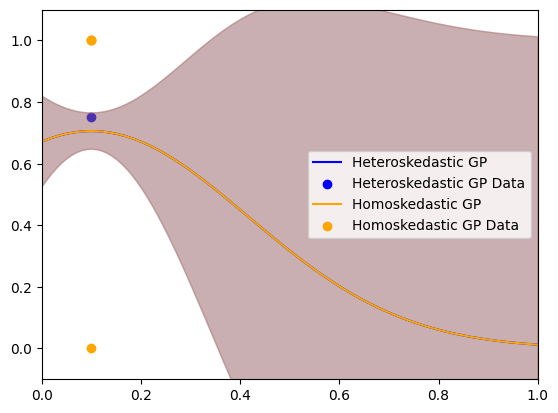

In [33]:
kernel_L = 5
base_sigma_sq = 0.25
x_plt = np.linspace(0, 1, 100) # plot 100 samples

data_x_aggr = np.array([0.1]).reshape(-1, 1)
data_y_aggr = np.array([3/4]).reshape(-1, 1)
sigma_sq_aggr = base_sigma_sq * 1 / np.array([4]).reshape(-1, 1)

data_x = np.vstack((0.1 * np.ones((4, 1)),))
data_y = np.vstack((np.ones((3, 1)), np.zeros((1, 1))))

hetRegressor = HeteroskedasticGaussianProcessRegressor(kernel_L, 1)
hetRegressor.load_data(data_x_aggr, data_y_aggr, sigma_sq_aggr)
y_hat1, y_sigma1 = hetRegressor.compute(x_plt.reshape(-1, 1))
plt.plot(x_plt, y_hat1, color="blue", label="Heteroskedastic GP")
plt.fill_between(x_plt, y_hat1 - y_sigma1, y_hat1 + y_sigma1, color="blue", alpha=0.3)
plt.scatter(data_x_aggr, data_y_aggr, color="blue", label="Heteroskedastic GP Data")

homRegressor = GaussianProcessRegressor(kernel_L, base_sigma_sq, 1)
homRegressor.load_data(data_x, data_y)
y_hat2, y_sigma2 = homRegressor.compute(x_plt.reshape(-1, 1))
plt.plot(x_plt, y_hat2, color="orange", label="Homoskedastic GP")
plt.fill_between(x_plt, y_hat2 - y_sigma2, y_hat2 + y_sigma2, color="orange", alpha=0.3)
plt.scatter(data_x, data_y, color="orange", label="Homoskedastic GP Data")

plt.xlim([0, 1])
plt.ylim([- 0.1, 1.1])
plt.legend()

In [37]:
def compute_inverse_D(M, sigma_sq, z):
    return 1 / (M * sigma_sq) * (np.eye(M) - 1 / (M * sigma_sq) * z * np.ones((M, M)) / (1 + z / sigma_sq))

In [39]:
M = 4
sigma_sq = base_sigma_sq / M
z = 1

print(compute_inverse_D(1, sigma_sq, z))
print(compute_inverse_D(M, sigma_sq, z))

[[0.94117647]]
[[ 3.05882353 -0.94117647 -0.94117647 -0.94117647]
 [-0.94117647  3.05882353 -0.94117647 -0.94117647]
 [-0.94117647 -0.94117647  3.05882353 -0.94117647]
 [-0.94117647 -0.94117647 -0.94117647  3.05882353]]
